In [ ]:
from PushshiftDumps.scripts.filter_file import process_file
from datetime import datetime


In [ ]:
single_field = None
write_bad_lines = True
hyperpop_terms = [
    # General Hyperpop Terms
    "hyperpop", "pc music", "100 gecs", "charli xcx", "sophie", "ag cook",  
    "danny l harle", "ravenna golden", "dorian electra", "glitchcore",  
    "bubblegum bass", "nightcore", "electropop", "experimental pop"


    # Artists & Producers
    "sophie xeon", "sophie oil of every pearl", "danny harlecore",  
    "gfoty", "umru", "caro", "fraxiom", "gupi", "laura les", "dylan brady",  
    "osno1", "ericdoa", "aldn", "midwxst", "underscores", "twikipedia",  "dorian electra"

    # Trans/Queer Themes in Hyperpop
    "vocaloid",
    "glitchcore", "pc music transgender", "pitch shifting"

    # Sound & Aesthetic
    "autotune", "pitch shifting", "vocaloid pop", "high-pitched vocals",  
    "distorted vocals", "glitch effects", "maximalist production",  
    "overcompressed music", "synthpop", "electronic pop",  

    # Cultural References
    "breakcore", "hardcore music", "club"

    # Related Online & Social Media Terms
    "soundcloud",  "bandcamp",

    # Subgenres & Overlapping Styles
    "breakcore", "future bass", "drum and bass", "footwork",  "jungle music"
    "jersey club", "vaporwave", "industrial", "chiptune",  

    # Trans Musicians & Representation
    "musicians",  
    "vocal dysphoria",
]

def filter_subreddit(input_file, output_file):
    output_format = "csv"
    from_date = datetime.strptime("2019-01-01", "%Y-%m-%d")
    to_date = datetime.strptime("2030-12-31", "%Y-%m-%d")
    field = "title"
    values = hyperpop_terms
    exact_match = False
    return process_file(input_file, output_file, output_format, field, values, from_date, to_date, single_field, exact_match)
    
def filter_comments(input_file, output_file):
    output_format = "csv"
    from_date = datetime.strptime("2018-01-01", "%Y-%m-%d")
    to_date = datetime.strptime("2030-12-31", "%Y-%m-%d")
    field = "body"
    values = hyperpop_terms
    exact_match = False
    return process_file(input_file, output_file, output_format, field, values, from_date, to_date, single_field, exact_match)

In [ ]:

# Filter out r/transgendercirclejerk submissions that contain the words related to hyperpop in the title
input_file = "Reddit Dump/reddit/reddit/subreddits23/transgendercirclejerk_submissions.zst"
output_file = "output/transgender_subs/transgendercirclejerk_submissions"

filter_subreddit(input_file, output_file)

In [ ]:
# Filter out r/transgendercirclejerk comments that contain the words related to hyperpop
input_file = "Reddit Dump/reddit/reddit/subreddits23/transgendercirclejerk_comments.zst"
output_file = "output/transgender_subs/transgendercirclejerk_comments"

filter_comments(input_file, output_file)


In [ ]:
# Filter out r/asktransgender submissions that contain the words related to hyperpop in the title
input_file = "Reddit Dump/reddit/reddit/subreddits23/asktransgender_submissions.zst"
output_file = "output/transgender_subs/asktransgender_submissions"

filter_subreddit(input_file, output_file)

In [ ]:
# Filter out r/asktransgender comments that contain the words related to hyperpop
input_file = "Reddit Dump/reddit/reddit/subreddits23/asktransgender_comments.zst"
output_file = "output/transgender_subs/asktransgender_comments"

filter_comments(input_file, output_file)

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def load_data(filename):
    """Loads Reddit data from a CSV file."""
    df = pd.read_csv(filename, header=None, names=["post_id", "date", "username", "url", "text"])
    return df

def clean_text(text):
    """Cleans Reddit post text: removes URLs, special characters, and stopwords."""
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # Remove URLs
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # Remove special characters
    text = " ".join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

def apply_cleaning(df):
    """Applies text cleaning to the dataframe."""
    df["clean_text"] = df["text"].apply(clean_text)
    return df

def analyze_sentiment_vader(text, analyzer):
    """Analyzes sentiment using VADER and returns the compound score."""
    scores = analyzer.polarity_scores(text)
    return scores["compound"]

def apply_sentiment_analysis(df):
    """Applies sentiment analysis to the dataframe."""
    analyzer = SentimentIntensityAnalyzer()
    df["sentiment_vader"] = df["clean_text"].apply(lambda x: analyze_sentiment_vader(x, analyzer))
    df["sentiment_label"] = df["sentiment_vader"].apply(lambda x: "positive" if x > 0.05 else "negative" if x < -0.05 else "neutral")
    return df

def filter_hyperpop(df):
    """Filters posts that mention 'hyperpop' as a standalone word."""
    hyperpop_pattern = r'(?<!\w)[("]*hyperpop[)"\.,!?]*(?!\w)'
    df_hyperpop = df[df['clean_text'].str.contains(hyperpop_pattern, na=False, regex=True)]
    return df_hyperpop

def save_results(df, output_filename):
    """Saves the processed dataframe to a CSV file."""
    df.to_csv(output_filename, index=False)
    print(f"Results saved to {output_filename}")


In [ ]:
# get ids of submissions that contain the word "hyperpop" in the title
output_file = ""
single_field = "id"
process_file(input_file, output_file, output_format, field, values, from_date, to_date, single_field, exact_match)

In [ ]:

# Process asktransgender_comments
filename = "output/transgender_subs/asktransgender_comments.csv" 
output_filename = "asktransgender_filtered_hyperpop_sentiment.csv"

df = load_data(filename)
df = apply_cleaning(df)
df = filter_hyperpop(df)
df = apply_sentiment_analysis(df)

save_results(df, output_filename)

df.head()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
# Load the processed DataFrame with sentiment analysis results
filename = "asktransgender_filtered_hyperpop_sentiment.csv"
df = pd.read_csv(filename)

# Set up the visual style for Seaborn
sns.set(style="whitegrid")

# Create a count plot for sentiment labels (positive, neutral, negative)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="sentiment_label", palette="coolwarm")
plt.title("Sentiment Distribution of Hyperpop-related Posts on r/asktransgender")
plt.xlabel("Sentiment Label")
plt.ylabel("Number of Posts")
plt.show()

# Create a distribution plot for sentiment_vader score
plt.figure(figsize=(8, 6))
sns.histplot(df["sentiment_vader"], bins=30, kde=True, color="skyblue")
plt.title("Sentiment Score Distribution (VADER)")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

# Optional: Boxplot to show sentiment_vader score distribution by sentiment label
plt.figure(figsize=(8, 6))
sns.boxplot(x="sentiment_label", y="sentiment_vader", data=df, palette="coolwarm")
plt.title("Sentiment Score by Sentiment Label")
plt.xlabel("Sentiment Label")
plt.ylabel("Sentiment Score (VADER)")
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("asktransgender_filtered_hyperpop_sentiment.csv")

# Convert 'date' column to datetime
df["date"] = pd.to_datetime(df["date"])

# Extract year and calculate mean sentiment per year
df["year"] = df["date"].dt.year
df_grouped = df.groupby("year")["sentiment_vader"].mean().reset_index()

# Set plot style
sns.set_theme(style="whitegrid")

# Create the line plot
plt.figure(figsize=(10, 5))
sns.lineplot(x="year", y="sentiment_vader", data=df_grouped, marker="o", linewidth=2, color="#ff7700")

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Average Sentiment Score")
plt.title("r/asktransgender Average Sentiment by Year (Posts Pertaining to Hyperpop)")

# Add a horizontal line at 0 (neutral sentiment reference)
plt.axhline(0, color="black", linestyle="--", linewidth=1)

# Show the plot
plt.show()


In [ ]:
# Filter out r/popheadscirclejerk submissions that contain words related to hyperpop
input_file = "Reddit Dump/reddit/reddit/subreddits23/popheadscirclejerk_comments.zst"
output_file = "output/hyperpop_filter/popheadscirclejerk_comments"

filter_comments(input_file, output_file)

In [ ]:

# Process popheadscirclejerk_comments
filename = "output/hyperpop_filter/popheadscirclejerk_comments.csv" 
output_filename = "popheadscirclejerk__filtered_hyperpop_sentiment.csv"

df = load_data(filename)
df = apply_cleaning(df)
df = filter_hyperpop(df)
df = apply_sentiment_analysis(df)

save_results(df, output_filename)

df.head()

In [ ]:
# Load the processed DataFrame with sentiment analysis results
filename = "popheadscirclejerk__filtered_hyperpop_sentiment.csv" 
df = pd.read_csv(filename)

# Import Seaborn for visualization
import seaborn as sns

# Set up the visual style for Seaborn
sns.set(style="whitegrid")

# Define the fixed order for sentiment labels
sentiment_order = ["positive", "neutral", "negative"]

# Create a count plot for sentiment labels (positive, neutral, negative)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="sentiment_label", palette="coolwarm", order=sentiment_order)
plt.title("Sentiment Distribution of Hyperpop-related Posts on r/popheadscirclejerk")
plt.xlabel("Sentiment Label")
plt.ylabel("Number of Posts")
plt.show()

# Create a distribution plot for sentiment_vader score
plt.figure(figsize=(8, 6))
sns.histplot(df["sentiment_vader"], bins=30, kde=True, color="skyblue")
plt.title("Sentiment Score Distribution (VADER)")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

# Optional: Boxplot to show sentiment_vader score distribution by sentiment label
plt.figure(figsize=(8, 6))
sns.boxplot(x="sentiment_label", y="sentiment_vader", data=df, palette="coolwarm", order=sentiment_order)
plt.title("Sentiment Score by Sentiment Label")
plt.xlabel("Sentiment Label")
plt.ylabel("Sentiment Score (VADER)")
plt.show()

In [ ]:
# Filter out r/soundcloud submissions that contain words related to hyperpop
input_file = "Reddit Dump/reddit/reddit/subreddits23/soundcloud_comments.zst"
output_file = "output/hyperpop_filter/soundcloud_comments"

filter_comments(input_file, output_file)

In [ ]:
# Process r/soundcloud comments with hyperpop-related terms
filename = "output/hyperpop_filter/soundcloud_comments.csv" 
output_filename = "soundcloud_filtered_hyperpop_sentiment.csv"

df = load_data(filename)
df = apply_cleaning(df)
df = apply_sentiment_analysis(df)

save_results(df, output_filename)

df.head()

In [ ]:
# Load the processed DataFrame with sentiment analysis results
filename = "soundcloud_filtered_hyperpop_sentiment.csv" 
df = pd.read_csv(filename)

# Import Seaborn for visualization
import seaborn as sns

# Set up the visual style for Seaborn
sns.set(style="whitegrid")

# Define the fixed order for sentiment labels
sentiment_order = ["positive", "neutral", "negative"]

# Create a count plot for sentiment labels (positive, neutral, negative)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="sentiment_label", palette="coolwarm", order=sentiment_order)
plt.title("Sentiment Distribution of Hyperpop-related Posts on r/soundcloud")
plt.xlabel("Sentiment Label")
plt.ylabel("Number of Posts")
plt.show()

# Create a distribution plot for sentiment_vader score
plt.figure(figsize=(8, 6))
sns.histplot(df["sentiment_vader"], bins=30, kde=True, color="skyblue")
plt.title("Sentiment Score Distribution (VADER)")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

# Optional: Boxplot to show sentiment_vader score distribution by sentiment label
plt.figure(figsize=(8, 6))
sns.boxplot(x="sentiment_label", y="sentiment_vader", data=df, palette="coolwarm", order=sentiment_order)
plt.title("Sentiment Score by Sentiment Label")
plt.xlabel("Sentiment Label")
plt.ylabel("Sentiment Score (VADER)")
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("soundcloud_filtered_hyperpop_sentiment.csv")

# Convert 'date' column to datetime
df["date"] = pd.to_datetime(df["date"])

# Extract year and calculate mean sentiment per year
df["year"] = df["date"].dt.year
df_grouped = df.groupby("year")["sentiment_vader"].mean().reset_index()

# Set plot style
sns.set_theme(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x="year", y="sentiment_vader", data=df_grouped, color="#ff7700")

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Average Sentiment Score")
plt.title("r/soundcloud Average Sentiment by Year (Posts Pertaining to Hyperpop)")

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("soundcloud_filtered_hyperpop_sentiment.csv")

# Convert 'date' column to datetime
df["date"] = pd.to_datetime(df["date"])

# Extract year and calculate mean sentiment per year
df["year"] = df["date"].dt.year
df_grouped = df.groupby("year")["sentiment_vader"].mean().reset_index()

# Set plot style
sns.set_theme(style="whitegrid")

# Create the line plot
plt.figure(figsize=(10, 5))
sns.lineplot(x="year", y="sentiment_vader", data=df_grouped, marker="o", linewidth=2, color="#ff7700")

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Average Sentiment Score")
plt.title("r/soundcloud Average Sentiment by Year (Posts Pertaining to Hyperpop)")

# Add a horizontal line at 0 (neutral sentiment reference)
plt.axhline(0, color="black", linestyle="--", linewidth=1)

# Show the plot
plt.show()


In [ ]:
# Extract the data from out r/HYPERPOP submissions
from PushshiftDumps.scripts.filter_file import process_file
from datetime import datetime

single_field = None
write_bad_lines = True
input_file = "Reddit Dump/reddit/reddit/subreddits23/HYPERPOP_comments.zst"
output_file = "output/HYPERPOP_comments"
output_format = "csv"
from_date = datetime.strptime("2018-01-01", "%Y-%m-%d")
to_date = datetime.strptime("2030-12-31", "%Y-%m-%d")
field = None
values = ['']
exact_match = False
process_file(input_file, output_file, output_format, field, values, from_date, to_date, single_field, exact_match)

In [ ]:
import pandas as pd
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a pandas DataFrame
filename = "HYPERPOP_cleaned.csv"
df = pd.read_csv(filename)

# Extract only the date and text columns
df_cleaned = df[['date', 'text']].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Function to clean the text
def clean_text(text):
    # Ensure the input is a string
    text = str(text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    # Remove special characters (except spaces)
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    # Remove HTML escape characters (like &lt; and &gt;)
    text = re.sub(r'&[a-zA-Z0-9]+;', '', text)
    return text

# Apply the cleaning function to the 'text' column
df_cleaned['text'] = df_cleaned['text'].apply(clean_text)

# Initialize VADER Sentiment Intensity Analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']  # Return the compound score

# Apply sentiment analysis to the 'text' column and create a new column 'sentiment'
df_cleaned['sentiment'] = df_cleaned['text'].apply(get_sentiment)

# Save the cleaned data with sentiment analysis to a new CSV file
output_filename = "hyperpop_sentiment.csv"
df_cleaned.to_csv(output_filename, index=False)

# Optional: Display the first few rows to verify the data
print(df_cleaned.head())

# Visualizing the sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['sentiment'], bins=30, kde=True, color='skyblue')
plt.title("Sentiment Distribution of r/hyperpop Comments")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the sentiment analysis data
df_sentiment = pd.read_csv("HYPERPOP_sentiment.csv")

# Convert the 'date' column to datetime format and extract the year
df_sentiment['year'] = pd.to_datetime(df_sentiment['date'], errors='coerce').dt.year

# Group by year and calculate the average sentiment for each year
yearly_sentiment = df_sentiment.groupby('year')['sentiment'].mean().reset_index()

# Visualizing the sentiment by year with a line graph
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_sentiment, x='year', y='sentiment', marker='o', color='skyblue')
plt.title("Average Sentiment of r/hyperpop Comments by Year")
plt.xlabel("Year")
plt.ylabel("Average Sentiment Score")
plt.xticks(yearly_sentiment['year'], rotation=45)
plt.grid(True)
plt.show()

# Optionally, save the results with sentiment by year
yearly_sentiment.to_csv("yearly_sentiment.csv", index=False)


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.corpus import stopwords

# Load the cleaned dataset
df = pd.read_csv('HYPERPOP_cleaned.csv')

# Manually define a list of words to filter out
unwanted_keywords = ['bot', 'account', 'question', 'moderator', 'concern', 'perform', 'action', 'spam', 'automated', 'post', 'delete']

# Function to filter out unwanted content
def filter_unwanted_content(df, unwanted_keywords):
    # Create a filter mask where text does not contain any unwanted keyword
    mask = df['text'].apply(lambda x: isinstance(x, str) and not any(word in x.lower() for word in unwanted_keywords))
    # Apply the filter to exclude rows with unwanted terms
    return df[mask]

# Filter the dataset to remove unwanted content
df_filtered = filter_unwanted_content(df, unwanted_keywords)

# Download NLTK stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

# Manually add queer-related stopwords that might clutter topics
queer_terms = ["trans", "queer", "gender", "lgbtq", "nonbinary", "identity"]
stop_words.extend(queer_terms)

# Vectorize the cleaned text
vectorizer = CountVectorizer(stop_words=stop_words, max_features=5000)
X = vectorizer.fit_transform(df_filtered['text'])

# Fit the LDA model
n_topics = 10  # Number of topics to extract, increased for more granularity
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(X)

# Get the top words for each topic
n_words = 10
terms = vectorizer.get_feature_names_out()

def get_top_words(model, n_words=10):
    topic_words = []
    for topic_idx, topic in enumerate(model.components_):
        top_words = [terms[i] for i in topic.argsort()[:-n_words - 1:-1]]
        topic_words.append(" ".join(top_words))
    return topic_words

topic_words = get_top_words(lda, n_words)

# Display the top words for each topic
for i, topic in enumerate(topic_words):
    print(f"Topic {i + 1}: {topic}")

# Save the filtered DataFrame to a new CSV file
df_filtered.to_csv('HYPERPOP_filtered_topics.csv', index=False)



In [ ]:
# Filtering r/HYPERPOP submissions for queer-related keywords
import pandas as pd

# Load the CSV into a DataFrame
df = pd.read_csv('HYPERPOP_cleaned.csv')

# List of queer-related keywords 
queer_keywords = [
    'queer', 'trans', 'LGBTQ', 'LGBTQ+', 'gender', 'gay', 'lesbian', 'nonbinary', 'bi', 'bisexual', 
    'drag', 'pride', 'pansexual', 'asexual', 'genderfluid', 'genderqueer', 'demisexual', 'intersex', 
    'two-spirit', 'agender', 'bigender', 'androgynous', 'cisgender', 'transition', 'transgender', 
    'transmasc', 'transfem', 'sapphic', 'queerplatonic', 'ace', 'alewife', 'butch', 'femme', 'masc', 
    'dyke', 'queer theory', 'queer activism', 'LGBT', 'gender expression', 'gender identity', 
    'drag king', 'drag queen', 'kink', 'queer culture', 'queer community', 'homosexual', 'biromantic', 
    'aromantic', 'polyamory', 'queer feminism', 'sex-positive', 'queer literature', 'queer music', 
    'queer spaces', 'rainbow', 'queer joy', 'transphobia', 'homophobia', 'cisnormative', 'gender nonconforming',
    'pronouns', 'they/them', 'he/him', 'she/her', 'Mx.', 'neopronouns', 'trans ally', 'trans rights', 
    'LGBT rights', 'coming out', 'family rejection', 'rainbow flag', 'pride flag', 'rainbow capitalism', 
    'queer liberation', 'gender expression', 'queer youth', 'trans youth', 'gender-neutral', 'transphobic', 
    'gender euphoria', 'trans acceptance', 'trans-inclusive', 'queer love', 'queer visibility', 'gender diversity'
]


# Function to check if the text contains any queer-related keywords (case insensitive)
def contains_queer_keywords(text):
    # Normalize to lowercase
    text = str(text).lower()
    
    # Check for exact matches (case insensitive, whole word match)
    return any(re.search(r'\b' + re.escape(keyword) + r'\b', text) for keyword in queer_keywords)

# Apply the filter
df_filtered = df[df['text'].apply(contains_queer_keywords)]

# Save the filtered results to a new CSV file
df_filtered.to_csv("HYPERPOP_filtered_queer_entries.csv", index=False)



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize VADER Sentiment Intensity Analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment classification based on compound score
def get_sentiment(text):
    # Ensure text is a string and handle NaN values
    if isinstance(text, str):  # Only process string values
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        return compound  # Return the compound score
    return 0  # Return 0 for non-string values (e.g., NaN)

# Load the data (use your appropriate file path)
df = pd.read_csv('HYPERPOP_queer_sentiment.csv')

# Replace NaN values with empty strings or filter them out
df['text'] = df['text'].fillna('')

# Apply sentiment analysis to the 'text' column and create a new column 'sentiment_vader' for compound scores
df['sentiment_vader'] = df['text'].apply(get_sentiment)

# Create a new column 'sentiment_label' based on the sentiment_vader score
df['sentiment_label'] = df['sentiment_vader'].apply(
    lambda x: 'positive' if x >= 0.05 else 'negative' if x <= -0.05 else 'neutral'
)

# Ensure the order of sentiment labels is positive, neutral, and negative
sentiment_order = ['positive', 'neutral', 'negative']

# Create a count plot for sentiment labels (positive, neutral, negative)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sentiment_label', palette='coolwarm', order=sentiment_order)
plt.title("Sentiment Distribution of Queer-related Posts on r/HYPERPOP")
plt.xlabel("Sentiment Label")
plt.ylabel("Number of Posts")
plt.show()

# Optional: Boxplot to show sentiment_vader score distribution by sentiment label
plt.figure(figsize=(8, 6))
sns.boxplot(x='sentiment_label', y='sentiment_vader', data=df, palette='coolwarm', order=sentiment_order)
plt.title("Sentiment Score by Sentiment Label")
plt.xlabel("Sentiment Label")
plt.ylabel("Sentiment Score (VADER)")
plt.show()

# Save the filtered results to a new CSV file with sentiment analysis
df.to_csv("filtered_output.csv", index=False)

# Optional: Display the first few rows to verify the data
print(df.head())


In [ ]:
# Extract the data from out r/SoundCloud submissions
from PushshiftDumps.scripts.filter_file import process_file
from datetime import datetime

single_field = None
write_bad_lines = True
input_file = "Reddit Dump/reddit/reddit/subreddits23/soundcloud_comments.zst"
output_file = "output/soundcloud_comments"
output_format = "csv"
from_date = datetime.strptime("2018-01-01", "%Y-%m-%d")
to_date = datetime.strptime("2030-12-31", "%Y-%m-%d")
field = None
values = ['']
exact_match = False
process_file(input_file, output_file, output_format, field, values, from_date, to_date, single_field, exact_match)

In [23]:
import pandas as pd
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

         date                                               text  sentiment
0  2017-12-31  Your post title did not use the proper formatt...     0.4939
1  2018-01-01  Your post title did not use the proper formatt...     0.4939
2  2018-01-01  Your post title did not use the proper formatt...     0.4939
3  2018-01-01                             this is real i like it     0.3612
4  2018-01-01  Your post title did not use the proper formatt...     0.4939


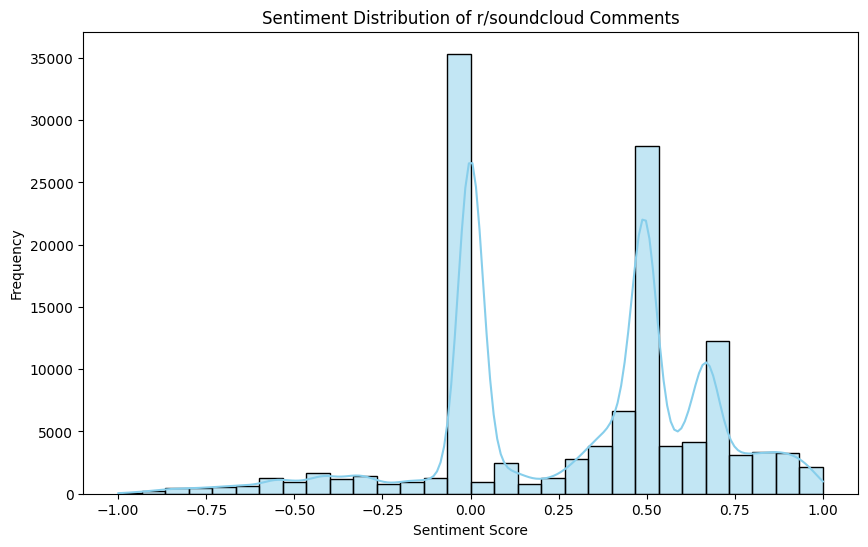

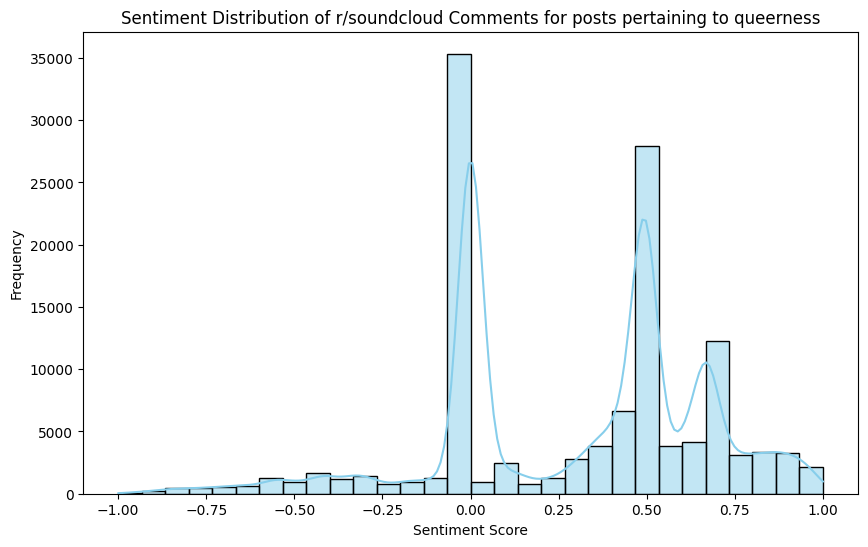

In [28]:
# Load the CSV file without headers and assign column names
df = pd.read_csv("output/soundcloud_comments.csv", header=None, names=['id', 'date', 'author', 'url', 'text'])

# Select only the 'date' and 'text' columns
df = df[['date', 'text']].copy()

# Function to clean the text
def clean_text(text):
    # Ensure the input is a string
    text = str(text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    # Remove special characters (except spaces)
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    # Remove HTML escape characters (like &lt; and &gt;)
    text = re.sub(r'&[a-zA-Z0-9]+;', '', text)
    return text

# Apply the cleaning function to the 'text' column
df_cleaned = df.copy()  # Create a copy of the DataFrame
df_cleaned['text'] = df['text'].apply(clean_text)

# Initialize VADER Sentiment Intensity Analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']  # Return the compound score

# Apply sentiment analysis to the 'text' column and create a new column 'sentiment'
df_cleaned['sentiment'] = df_cleaned['text'].apply(get_sentiment)

# Save the cleaned data with sentiment analysis to a new CSV file
df_cleaned.to_csv("soundcloud_sentiment.csv", index=False)

# Display results
print(df_cleaned.head())

# Visualizing the sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['sentiment'], bins=30, kde=True, color='skyblue')
plt.title("Sentiment Distribution of r/soundcloud Comments for posts pertaining to queerness")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()


In [1]:
# Filter out queer terms using SpaCy's NER tools
import spacy
from spacy.matcher import PhraseMatcher
import pandas as pd

# Load spaCy's small English model
nlp = spacy.load("en_core_web_sm")

# Define LGBTQ+ relevant phrases
queer_terms = [
    "LGBTQ", "LGBTQ+", "lesbian", "nonbinary", "bisexual", "pansexual",
    "asexual", "genderfluid", "genderqueer", "demisexual", "intersex",
    "two-spirit", "agender", "bigender", "cisgender", "transgender",
    "transmasc", "transfem", "sapphic", "queerplatonic", "butch", "femme",
    "dyke", "queer theory", "queer activism", "gender expression", "gender identity",
    "drag king", "drag queen", "queer culture", "queer community", "biromantic",
    "aromantic", "polyamory", "queer feminism", "sex-positive", "queer literature",
    "queer music", "queer spaces", "queer joy", "transphobia", "homophobia",
    "cisnormative", "gender nonconforming", "neopronouns", "trans ally", "trans rights",
    "coming out", "gender euphoria", "trans acceptance", "trans-inclusive"
]

# Create PhraseMatcher
matcher = PhraseMatcher(nlp.vocab, attr="LOWER")
patterns = [nlp.make_doc(term) for term in queer_terms]
matcher.add("QUEER_TERMS", patterns)

# Function to check if text contains relevant LGBTQ+ terms
def contains_queer_terms(text):
    doc = nlp(text)
    matches = matcher(doc)
    return len(matches) > 0  # Return True if any matches found

# Load your dataset (replace with actual file path)
df = pd.read_csv('soundcloud_sentiment.csv')

# Apply the filter
df_filtered = df[df["text"].apply(contains_queer_terms)]

# Display results
print(df_filtered)

# Save the filtered results to a new CSV file
df_filtered.to_csv("soundcloud_queer_sentiment.csv", index=False)


OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.